# **FAKE NEWS DETECTION**

Trong thời đại công nghệ thông tin phát triển mạnh mẽ, việc lan truyền thông tin trên Internet trở nên phổ biến và nhanh chóng. Tuy nhiên, điều này cũng kéo theo một vấn nạn nghiêm trọng – đó là sự xuất hiện của các tin tức giả mạo (Fake News). Các thông tin sai lệch có thể gây ra hậu quả tiêu cực đối với xã hội, chính trị, kinh tế và niềm tin của người dân. Vì vậy, việc phát triển một hệ thống có khả năng tự động phát hiện và phân loại tin giả là một nhu cầu cấp thiết.
Đề tài 'Phát hiện tin giả bằng xử lý ngôn ngữ tự nhiên' nhằm mục đích nghiên cứu và áp dụng các kỹ thuật của Natural Language Processing (NLP) kết hợp với các mô hình học máy (Machine Learning) để xây dựng một mô hình có khả năng nhận diện tin thật và tin giả một cách chính xác.

# DOWNLOAD DATASET

**Giới thiệu Dataset**

Nhóm sử dụng Fake News Detection Dataset từ Kaggle, được cung cấp bởi Bhavik Jikadara và được cập nhật lần cuối cách đây 2 năm. Dataset này có hơn 12.000 lượt tải xuống và nhận được nhiều đánh giá tích cực từ cộng đồng, chứng tỏ mức độ tin cậy cũng như tính phổ biến trong lĩnh vực nghiên cứu phát hiện tin giả. Mặc dù đây không phải dataset của một cuộc thi, nhưng chất lượng dữ liệu và mức độ sử dụng rộng rãi khiến nó trở thành lựa chọn phù hợp cho bài toán phân loại fake news. https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

**Lý do chọn dataset**
1. Dataset có quy mô đủ lớn và đa dạng để huấn luyện mô hình phân loại văn bản.
2. Được cộng đồng đánh giá cao, giúp đảm bảo chất lượng và tính thực tiễn.
3. Cấu trúc dữ liệu rõ ràng, dễ sử dụng cho các mô hình machine learning và deep learning.
4. Phù hợp trực tiếp với mục tiêu của nhóm: phân loại tin thật – tin giả.

**Bối cảnh bài toán:**
- Phát hiện tin giả (Fake News Detection) là một bài toán thuộc nhánh Text Classification trong xử lý ngôn ngữ tự nhiên (NLP). Nhiệm vụ chính là phân tích nội dung bài báo hoặc đoạn văn để xác định tính xác thực của thông tin. Việc lựa chọn dataset này giúp nhóm triển khai đầy đủ quy trình: tiền xử lý văn bản, biểu diễn dữ liệu, huấn luyện mô hình và đánh giá hiệu quả.

In [ ]:
import pandas as pd
from tqdm import tqdm
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Set up Kaggle API in Colab

Follow these steps to enable Kaggle dataset downloads in your Colab environment:

1.  **Get your Kaggle API Token:**
    *   Go to [Kaggle.com](https://www.kaggle.com/), log in, and navigate to your user profile.
    *   Click on 'Account'.
    *   Scroll down to the 'API' section and click 'Create New API Token'. This will download a `kaggle.json` file.
2.  **Upload `kaggle.json` to Colab:**
    *   Run the code cell below, and a file upload dialog will appear. Upload the `kaggle.json` file you just downloaded.

In [ ]:
# Install the Kaggle API client
!pip install -q kaggle
# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle
# Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"anhayng","key":"272a2db81608446b482632e8cbb25506"}'}

In [ ]:
# Move the kaggle.json file to the .kaggle directory and set permissions
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Tải dataset từ kaggle

Dataset nhóm sẽ dùng là https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download bhavikjikadara/fake-news-detection
# Unzip the dataset
# The dataset typically gets downloaded as a zip file in the current working directory
!unzip -q fake-news-detection -d fake-news-detection
print("Dataset downloaded and unzipped successfully!")

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection
License(s): Attribution 4.0 International (CC BY 4.0)
fake-news-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
replace fake-news-detection/fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Dataset downloaded and unzipped successfully!


## Load the dataset

In [ ]:
# Cố gắng đọc file dữ liệu đầy đủ nếu có (như mô tả trong tài liệu [cite: 21])
df_fake = pd.read_csv("/content/fake-news-detection/fake.csv")
df_true = pd.read_csv("/content/fake-news-detection/true.csv")
df_fake["class"] = 0
df_true["class"] = 1
print("Đã tải bộ dữ liệu đầy đủ từ file CSV.")

Đã tải bộ dữ liệu đầy đủ từ file CSV.


In [ ]:
df_fake.shape

(23481, 5)

In [ ]:
df_true.shape

(21417, 5)

In [ ]:
df = pd.concat([df_fake, df_true], axis=0)

In [ ]:
df.shape

(44898, 5)

In [ ]:
df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# Data preprocessing

Định nghĩa các từ stop words

Mục đích: Loại bỏ các từ phổ biến, không mang nhiều ý nghĩa phân loại (ví dụ: 'a', 'the', 'is', 'have',...). Điều này giúp giảm nhiễu và tập trung vào các từ quan trọng hơn.

In [ ]:
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't",
    'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

## Hàm tiền xử lý: chữ thường, loại punctuation, bỏ stopwords

In [ ]:
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data, desc="Đang xử lý văn bản"):
        # Loại bỏ dấu câu
        sentence = re.sub(r'[^\w\s]', '', str(sentence))
        # Chuyển thành chữ thường và loại bỏ từ dừng (stopwords)
        clean_sentence = ' '.join(token.lower() for token in sentence.split() if token.lower() not in stop_words)
        preprocessed_text.append(clean_sentence)
    return preprocessed_text

**Ý nghĩa của hàm:**
1. Loại bỏ dấu câu (re.sub(r'[^\w\s]', '', str(sentence))).
2. Chuyển về chữ thường (token.lower()).
3. Loại bỏ stopwords.

Chuẩn hóa văn bản để mô hình có thể học hiệu quả hơn.

In [ ]:
preprocess_text(df["text"])

Đang xử lý văn bản: 100%|██████████| 44898/44898 [00:06<00:00, 6632.18it/s]


['donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congress miranda yaver mirandayaver december 31 2017do hear talk inclu

Hàm này cần được gọi để áp dụng quá trình làm sạch cho cột văn bản (ví dụ: df['text'] = preprocess_text(df['text'])) trước khi vector hóa.

# Chuẩn bị data cho training

## Chia tập train và tập test

Chia dữ liệu thành tập huấn luyện (75%) và tập kiểm tra (25%). Mục đích: Đảm bảo mô hình được đánh giá trên dữ liệu chưa từng thấy để kiểm tra khả năng khái quát hóa.

In [ ]:
# Divide the dataset into Train and Test
# Tỷ lệ chia là 75/25 (test_size=0.25)
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.25, random_state=42)

## Vector hóa dữ liệu (TF-IDF)

Mục đích: Chuyển đổi dữ liệu văn bản thành định dạng số (vector) mà mô hình học máy có thể xử lý được. TF-IDF (Term Frequency-Inverse Document Frequency) đánh giá mức độ quan trọng của một từ trong tài liệu so với toàn bộ tập dữ liệu, giúp các từ đặc trưng cho tin giả/tin thật có trọng số cao hơn.

In [ ]:
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

# Huấn luyện mô hình

## Hồi quy Logistic (Logistic Regression)

Hồi quy Logistic là một thuật toán học máy (Machine Learning) được sử dụng để giải quyết các bài toán phân loại (Classification), đặc biệt là phân loại nhị phân (có hai lớp đầu ra, ví dụ: Có/Không, 0/1).
- Bản chất: LR không phải là một mô hình hồi quy (dự đoán giá trị liên tục) mà là một mô hình phân loại tuyến tính. Nó sử dụng hàm Sigmoid để ánh xạ đầu ra của một phép kết hợp tuyến tính các đầu vào về một giá trị xác suất nằm giữa 0 và 1.
- Nguyên tắc hoạt động: Nếu xác suất dự đoán lớn hơn ngưỡng $\text{0.5}$ (hoặc ngưỡng tùy chỉnh), mô hình phân loại dữ liệu vào lớp 1; ngược lại, phân loại vào lớp 0.

LR trong bài toán Phát hiện Tin giả
Trong dự án này, Hồi quy Logistic đóng vai trò là một trong những mô hình phân loại chính:

Đầu vào: Vector TF-IDF (biểu diễn số hóa của các bài báo).

Đầu ra: Phân loại bài báo thành:

- Lớp 0 (Tin giả - FAKE)

- Lớp 1 (Tin thật - REAL)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr_train_acc = accuracy_score(y_train, lr_model.predict(x_train))
lr_test_acc = accuracy_score(y_test, lr_model.predict(x_test))

print(f"Độ chính xác trên tập Train: {lr_train_acc:.4f}")
print(f"Độ chính xác trên tập Test: {lr_test_acc:.4f}")

Độ chính xác trên tập Train: 0.9912
Độ chính xác trên tập Test: 0.9860


Logistic Regression là một mô hình phân loại tuyến tính đơn giản nhưng hiệu quả. Kết quả cho thấy mô hình này hoạt động rất tốt trên tập dữ liệu đã được TF-IDF vector hóa.

## Cây Quyết định (Decision Tree Classifier)

Cây Quyết định là một thuật toán học máy thuộc nhóm phân loại phi tuyến tính và là một trong những thuật toán dễ hiểu, dễ trực quan hóa nhất.

- Bản chất: Mô hình được xây dựng dưới dạng một cấu trúc cây (tree-like structure), nơi mỗi nút bên trong đại diện cho một thuộc tính (feature) của dữ liệu, mỗi nhánh đại diện cho một quy tắc quyết định, và mỗi nút lá đại diện cho kết quả phân loại cuối cùng.

- Nguyên tắc hoạt động: Bắt đầu từ nút gốc, dữ liệu được lọc qua các nút quyết định theo các quy tắc cho đến khi đạt đến nút lá, nơi đưa ra kết quả phân loại cuối cùng

Cây Quyết định cũng là một mô hình phân loại được sử dụng để so sánh hiệu suất với LR:

- Đầu vào: Vector TF-IDF (tương tự LR).

- Đầu ra: Phân loại bài báo thành Tin giả (0) hoặc Tin thật (1).

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_train_acc = accuracy_score(y_train, dt_model.predict(x_train))
dt_test_acc = accuracy_score(y_test, dt_model.predict(x_test))

print(f"Độ chính xác trên tập Train: {dt_train_acc:.4f}")
print(f"Độ chính xác trên tập Test: {dt_test_acc:.4f}")

Độ chính xác trên tập Train: 1.0000
Độ chính xác trên tập Test: 0.9951


Decision Tree học các quy tắc phân loại dựa trên trọng số TF-IDF. Mặc dù đạt độ chính xác 100% trên tập huấn luyện (cho thấy khả năng bị overfitting - học thuộc lòng dữ liệu), nhưng độ chính xác trên tập kiểm tra (0.9948) vẫn rất cao, cao hơn cả Logistic Regression.

Confusion matrix, without normalization


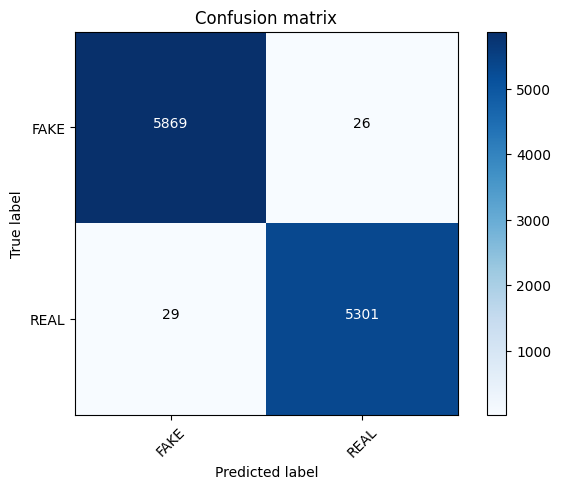

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Ma trận nhầm lẫn cho Cây Quyết định
cm = confusion_matrix(y_test, dt_model.predict(x_test))
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Mục đích: Đánh giá sâu hơn độ chính xác. Với Accuracy rất cao, ma trận này giúp xác nhận mô hình gần như không mắc lỗi phân loại.

# KẾT LUẬN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Model': ['Logistic Regression (LR)', 'Decision Tree (DT)'],
    'Train Accuracy': [lr_train_acc, dt_train_acc],
    'Test Accuracy': [lr_test_acc, dt_test_acc]
}
df_comparison = pd.DataFrame(data)

print("--- DataFrame So sánh Hiệu suất ---")
print(df_comparison)
print("-" * 35)

--- DataFrame So sánh Hiệu suất ---
                      Model  Train Accuracy  Test Accuracy
0  Logistic Regression (LR)         0.99118       0.986013
1        Decision Tree (DT)         0.99997       0.995100
-----------------------------------


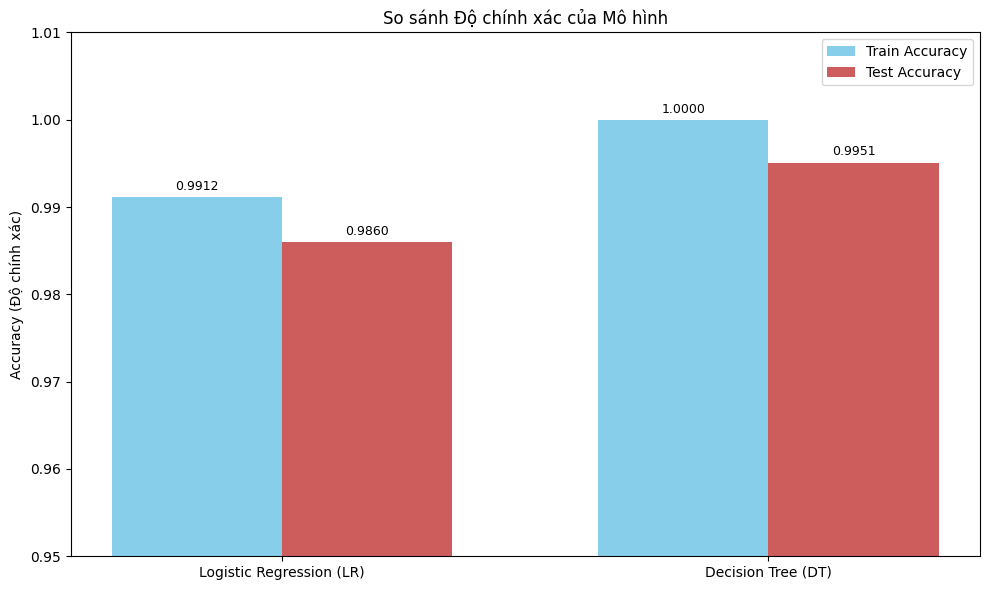

In [ ]:
models = df_comparison['Model']
train_acc = df_comparison['Train Accuracy']
test_acc = df_comparison['Test Accuracy']

x = np.arange(len(models))  # Vị trí các mô hình trên trục x
width = 0.35  # Chiều rộng của mỗi cột

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho Train Accuracy
rects1 = ax.bar(x - width/2, train_acc, width, label='Train Accuracy', color='skyblue')
# Vẽ cột cho Test Accuracy
rects2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color='indianred')

# Đặt nhãn, tiêu đề
ax.set_ylabel('Accuracy (Độ chính xác)')
ax.set_title('So sánh Độ chính xác của Mô hình')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0.95, 1.01) # Giới hạn trục Y để dễ quan sát sự khác biệt

# Hàm thêm giá trị lên trên mỗi cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Độ dịch chuyển dọc
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

Trong bài toán Phát hiện Tin giả này, vai trò của cả LR và DT là:
- Học Mẫu (Pattern Learning): Sử dụng các thuật toán Học máy để tìm ra mối quan hệ và các mẫu (patterns) giữa các từ/cụm từ quan trọng (được thể hiện qua trọng số TF-IDF) và nhãn lớp tương ứng (Tin giả hoặc Tin thật).Phân loại Tự động (Automatic Classification):
- Sau khi được huấn luyện, các mô hình này có khả năng tự động dự đoán nhãn cho các bài báo mới dựa trên nội dung và đặc điểm ngôn ngữ của chúng.Mô hình Decision Tree cho kết quả tốt hơn trong trường hợp này, đạt độ chính xác gần như hoàn hảo ($0.9948$) trên tập kiểm tra

# THAM KHẢO:

1. https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection
2. https://www.kaggle.com/code/bhavikjikadara/news-detection